# Regression models with Regularization

In [159]:
from sklearn import __version__
__version__

'1.3.0'

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [161]:
# for holdout cv
from sklearn.model_selection import train_test_split

In [162]:
# for K-fold cv
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [163]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [164]:
from sklearn.linear_model import Ridge, Lasso

In [165]:
df = pd.read_csv('Hitters.csv')
df.shape

(322, 20)

In [166]:
df.iloc[:5,-10:]

,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,30,29,14,A,E,446,33,20,NaN,A
1,321,414,375,N,W,632,43,10,475.0,N
2,224,266,263,A,W,880,82,14,480.0,A
3,828,838,354,N,E,200,11,3,500.0,N
4,48,46,33,N,E,805,40,4,91.5,N


In [167]:
# drop NAs

In [168]:
d0 = df.dropna()
d0.shape

(263, 20)

In [169]:
# Reserve 1st row for prediction
#d1 = d0[:1].copy()
#d1

In [170]:
#d0 = d0[1:]
#d0.shape

In [171]:
y = d0.Salary
x0 = d0.drop(['Salary'],axis=1)

In [172]:
x0.dtypes

AtBat         int64
Hits          int64
HmRun         int64
Runs          int64
RBI           int64
Walks         int64
Years         int64
CAtBat        int64
CHits         int64
CHmRun        int64
CRuns         int64
CRBI          int64
CWalks        int64
League       object
Division     object
PutOuts       int64
Assists       int64
Errors        int64
NewLeague    object
dtype: object

In [173]:
# there are 3 categorical columns

In [174]:
x = pd.get_dummies(x0,
                   columns = ['League','Division','NewLeague'],
                   drop_first=True)
x.iloc[:5,-10:]

,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,69,321,414,375,632,43,10,1,1,1
2,63,224,266,263,880,82,14,0,1,0
3,225,828,838,354,200,11,3,1,0,1
4,12,48,46,33,805,40,4,1,0,1
5,19,501,336,194,282,421,25,0,1,0


In [175]:
X = x.astype('float64')

## Ridge Regression

In [176]:
# Create a 1D array of 100 alpha values 
# ranging from very small to very large

In [177]:
alphas = 10**np.linspace(10,-2,100)

In [178]:
alphas.shape

(100,)

In [179]:
# 10^(-2)
alphas.min()

0.01

In [180]:
# 10^10
alphas.max()

10000000000.0

In [181]:
# fit 100 Ridge regression models, 
# one for each alpha (scaling all cols)

In [182]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [183]:
model = Ridge()

In [184]:
coefs = []
for a in alphas:
    model.set_params(alpha = a)
    model.fit(X_scaled, y)
    coefs.append(model.coef_)

In [185]:
# regression coefficients of the last model
pd.DataFrame(coefs[99], index = X.columns)

,0
AtBat,-290.918728
Hits,337.229910
HmRun,37.495419
Runs,-60.017790
RBI,-26.665375
Walks,134.928045
Years,-17.051824
CAtBat,-388.777849
CHits,88.580588
CHmRun,-12.898994


In [186]:
# Store regression coeffs in a DataFrame

In [187]:
df = pd.DataFrame(coefs)
df.columns = x.columns
df.index = alphas
df.index.name = 'alpha'
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
alpha,,,,,,,,,,,,,,,,,,,
1.000000e+10,0.000005,0.000005,0.000004,0.000005,0.000005,0.000005,0.000005,0.000006,0.000007,0.000006,0.000007,0.000007,0.000006,0.000004,3.012107e-07,-6.395428e-08,-1.691230e-07,-0.000002,-3.356510e-08
7.564633e+09,0.000006,0.000007,0.000005,0.000007,0.000007,0.000007,0.000006,0.000008,0.000009,0.000008,0.000009,0.000009,0.000008,0.000005,3.981828e-07,-8.454381e-08,-2.235706e-07,-0.000003,-4.437104e-08
5.722368e+09,0.000008,0.000009,0.000007,0.000009,0.000009,0.000009,0.000008,0.000011,0.000011,0.000011,0.000012,0.000012,0.000010,0.000006,5.263742e-07,-1.117620e-07,-2.955470e-07,-0.000004,-5.865581e-08
4.328761e+09,0.000011,0.000012,0.000009,0.000011,0.000012,0.000012,0.000011,0.000014,0.000015,0.000014,0.000015,0.000016,0.000013,0.000008,6.958357e-07,-1.477427e-07,-3.906955e-07,-0.000005,-7.753936e-08
3.274549e+09,0.000014,0.000016,0.000012,0.000015,0.000016,0.000016,0.000014,0.000019,0.000020,0.000019,0.000020,0.000021,0.000018,0.000011,9.198538e-07,-1.953073e-07,-5.164761e-07,-0.000007,-1.025022e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.053856e-02,-290.565733,336.039547,36.783312,-58.919331,-26.010245,134.636895,-17.778470,-384.094384,92.105310,-10.391640,471.394628,253.872789,-212.370325,78.762198,5.350006e+01,-2.225474e+01,3.126419e+01,-58.503548,-1.245482e+01
2.310130e-02,-290.692507,336.464367,37.037600,-59.311089,-26.244216,134.741106,-17.516885,-385.794898,90.881489,-11.280807,473.604369,255.476124,-212.728953,78.761896,5.355691e+01,-2.223273e+01,3.126106e+01,-58.482132,-1.243018e+01
1.747528e-02,-290.789150,336.790313,37.232619,-59.611894,-26.423634,134.820836,-17.317830,-387.078202,89.916997,-11.967363,475.303911,256.712435,-213.005133,78.761698,5.359983e+01,-2.221573e+01,3.125844e+01,-58.465774,-1.241105e+01


Each row has 19 ridge regression coefficients

In [191]:
df.round(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
alpha,,,,,,,,,,,,,,,,,,,
1.000000e+10,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000
7.564633e+09,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000
5.722368e+09,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000
4.328761e+09,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000
3.274549e+09,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.053856e-02,-290.566,336.040,36.783,-58.919,-26.010,134.637,-17.778,-384.094,92.105,-10.392,471.395,253.873,-212.370,78.762,53.500,-22.255,31.264,-58.504,-12.455
2.310130e-02,-290.693,336.464,37.038,-59.311,-26.244,134.741,-17.517,-385.795,90.881,-11.281,473.604,255.476,-212.729,78.762,53.557,-22.233,31.261,-58.482,-12.430
1.747528e-02,-290.789,336.790,37.233,-59.612,-26.424,134.821,-17.318,-387.078,89.917,-11.967,475.304,256.712,-213.005,78.762,53.600,-22.216,31.258,-58.466,-12.411


In [33]:
# some models with close-to-zero coefficients

In [34]:
# plot coefficients vs alphas

/Users/cam/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:701: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(self.xlim)


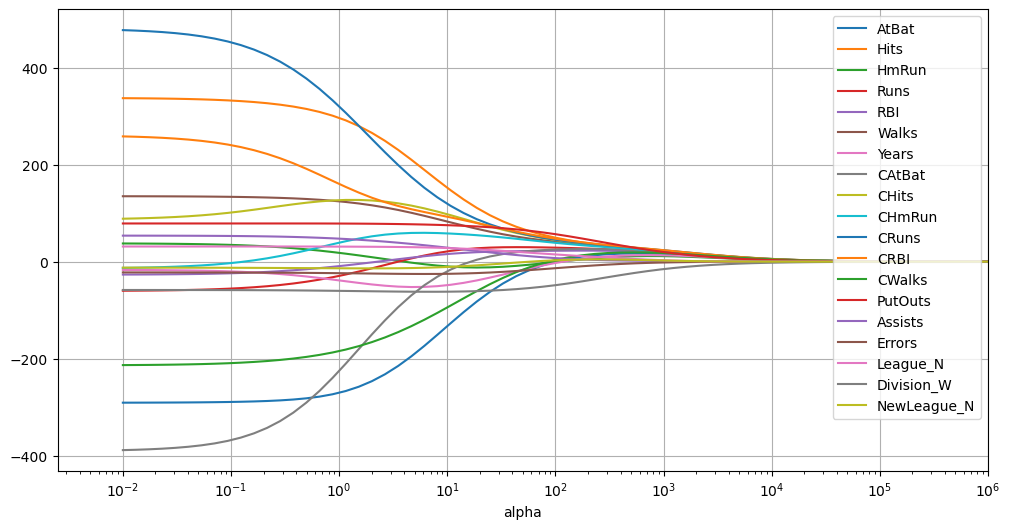

In [194]:
df.plot(figsize=(12,6),grid=True,logx=True,xlim = (0.00,10**6))
plt.legend(loc='upper right');

In [36]:
# coefficients shrink to zero as alpha values increase

In [40]:
np.set_printoptions(suppress=True)

### Holdout Cross Validation with alpha known

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.5,
                                                 random_state=1)

In [38]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### fit model with alpha = 4

In [41]:
ridge2 = Ridge(alpha=4)
ridge2.fit(X_train_scaled, y_train)
pred2 = ridge2.predict(X_test_scaled)     
mspe = mean_squared_error(y_test, pred2)
mspe

102144.52395076505

#### fit model with huge alpha = 10^9

In [42]:
ridge3 = Ridge(alpha=10**9)
ridge3.fit(X_train_scaled, y_train)
pred3 = ridge3.predict(X_test_scaled)          
mspe = mean_squared_error(y_test, pred3)
mspe

172862.0826375247

In [ ]:
# Huge alpha makes over-shrinking which increases test MSE
# all coeffs very close to zero

### Linear Regression (alpha = 0)

In [43]:
ols_model = Ridge(alpha=0)
ols_model.fit(X_train_scaled, y_train)
pred = ols_model.predict(X_test_scaled)          
ols_mse = mean_squared_error(y_test, pred)
ols_mse

116690.468566612

In [ ]:
# RR test MSPE smaller than OLS

### Holdout Cross Validation searching for alpha

In [108]:
X_nontest,X_test,y_nontest,y_test = train_test_split(X,y,
                                                 test_size=0.40,
                                                 random_state=1)

In [109]:
X_train,X_validation,y_train,y_validation = train_test_split(X_nontest,y_nontest,
                                                 test_size=0.5,
                                                 random_state=1)

In [110]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

In [111]:
ridge_model = Ridge()

In [112]:
validation_mspes = []

for a in alphas:
    ridge_model.set_params(alpha = a)
    ridge_model.fit(X_train_scaled, y_train)
    yhat = ridge_model.predict(X_validation_scaled)
    mspe = mean_squared_error(y_validation,yhat)
    validation_mspes.append(mspe)

In [113]:
df = pd.DataFrame(validation_mspes,
                  columns = ['Valid_MSE'])
df.index = alphas
df.index.name = 'alpha'
df

,Valid_MSE
alpha,
1.000000e+10,161825.790184
7.564633e+09,161825.786925
5.722368e+09,161825.782617
4.328761e+09,161825.776922
3.274549e+09,161825.769393
...,...
3.053856e-02,111339.084798
2.310130e-02,111577.207548
1.747528e-02,111800.332935


In [119]:
min1 = df.Valid_MSE.min()
min1

78821.05978981467

In [120]:
df[df.Valid_MSE == min1]

,Valid_MSE
alpha,
75.646333,78821.05979


In [115]:
# best alpha giving min Validation MSE
best_alpha = df.Valid_MSE.idxmin()
best_alpha

75.64633275546291

In [116]:
# plot MSPE vs alpha

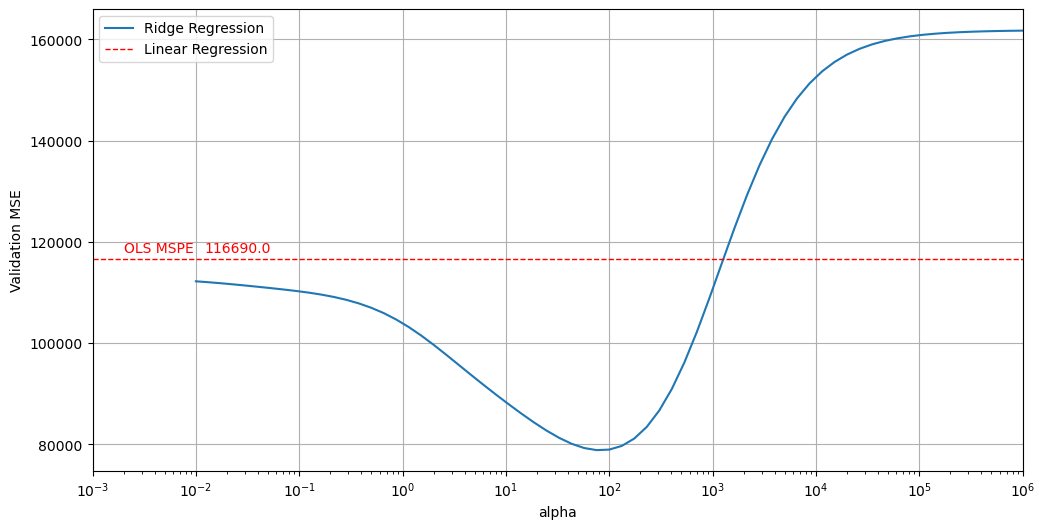

In [117]:
df.plot(figsize=(12,6),grid=True,logx=True,xlim = (0.001,10**6))
# add horizontal line with OLS MSPE
plt.axhline(y = ols_mse,linestyle = '--',c='r',linewidth=1)
plt.annotate(round(ols_mse,0),xy=(0.012,1.01*ols_mse), c='r')
plt.annotate('OLS MSPE',xy=(0.002,1.01*ols_mse), c='r')
#
plt.ylabel('Validation MSE')
plt.legend(("Ridge Regression", "Linear Regression"));

In [118]:
# Smallest Validation MSE

In [101]:
min1 = min(validation_mspes)
min1

78821.05978981467

In [102]:
validation_mspes.index(min1)

67

In [103]:
# best alpha (minimizing validation MSE)

In [121]:
alphas[67]

75.64633275546291

In [122]:
# Min Validation MSE is 75.64633275546291

In [123]:
scaler = StandardScaler()
scaler.fit(X_nontest)
X_nontest_scaled = scaler.transform(X_nontest)
X_test_scaled = scaler.transform(X_test)

In [124]:
ridge2 = Ridge(alpha = best_alpha)
ridge2.fit(X_nontest_scaled, y_nontest)
pred2 = ridge2.predict(X_test_scaled)          
mspe = mean_squared_error(y_test, pred2)
mspe

99508.83201629658

## Ridge Regression  5-fold cross validation to find best alpha

In [140]:
X_train,X_test,\
y_train,y_test = train_test_split(X,y,test_size=0.5,
                                  random_state=1)

In [141]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [142]:
scaler = StandardScaler()
model = Ridge()
pipe1 = Pipeline([('scaler', scaler),('ridge', model)])

In [143]:
param_grid = {'ridge__alpha': alphas}

In [144]:
ridgecv = GridSearchCV(pipe1,param_grid,cv = 5,
                       scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train);

In [145]:
# best alpha (minimizing validation MSE)

In [146]:
ridgecv.best_params_

{'ridge__alpha': 100.0}

In [147]:
alpha1 = ridgecv.best_params_['ridge__alpha']
alpha1

100.0

In [148]:
# test MSE with best alpha

In [149]:
# fit RR model with best alpha
ridge1 = Ridge(alpha=alpha1)
ridge1.fit(X_train_scaled,y_train);

In [150]:
yhat = ridge1.predict(X_test_scaled)
best_mspe = mean_squared_error(y_test, yhat)
best_mspe

99586.56834382795

In [151]:
ridgecv.best_estimator_.named_steps

{'scaler': StandardScaler(), 'ridge': Ridge(alpha=100.0)}

In [152]:
ridgecv.best_estimator_.named_steps.ridge.coef_

array([  3.91135935,  36.09635974,   1.73668011,  19.61165904,
        32.21913156,  43.97240993,   8.49644681,  17.99283943,
        32.5450565 ,  41.51292542,  33.27193592,  41.57133374,
        25.53583306,  75.76136575,  -2.47595326,  -0.79266655,
         8.2142983 , -41.60836804,   5.21195537])

In [154]:
# coefficients of best RR model

df4 = pd.DataFrame(ridge1.coef_,index=X.columns,
                   columns=['ridge_coeff'])
df4

,ridge_coeff
AtBat,3.911359
Hits,36.096360
HmRun,1.736680
Runs,19.611659
RBI,32.219132
Walks,43.972410
Years,8.496447
CAtBat,17.992839
CHits,32.545056
CHmRun,41.512925


### predict salary of first player in test set

In [155]:
newval = X_test_scaled[:1]
newval

array([[-0.75403349, -0.59086622,  0.20177987, -0.63314908, -0.00973381,
        -0.45405721, -0.50193827, -0.42197414, -0.40314783,  0.01162816,
        -0.43551916, -0.17330772, -0.4452582 ,  1.27997267, -0.33878194,
        -0.44171974, -1.03892496,  0.99239533, -1.00766295]])

In [156]:
ridge1.predict(newval)

array([461.60866494])

In [157]:
d0.loc[1,'Salary']

475.0

## Lasso Regression

In [ ]:
# lasso may not converge unless large number of iterations

In [ ]:
lasso_model = Lasso(max_iter = 10000, normalize = True)

coefs = []
for a in alphas:
    lasso_model.set_params(alpha=a)
    lasso_model.fit(X_train,y_train)
    coefs.append(lasso_model.coef_)

In [ ]:
# convert list of coefficients to a dataframe

In [ ]:
df = pd.DataFrame(coefs)
df.columns = x.columns
df.index = alphas
df.index.name = 'alpha'

In [ ]:
df.plot(figsize=(12,6),grid=True,logx=True,xlim = (0.007,10**6))
plt.legend(loc='right');

In [ ]:
# coefficients shrink to zero as alpha values increase

## LASSO  10-fold cross validation to find best alpha

In [ ]:
lassocv = LassoCV(alphas = alphas, cv=10, max_iter = 100000, 
                  normalize = True)
lassocv.fit(X_train,y_train);

In [ ]:
# best alpha (minimizing train MSE)

In [ ]:
lassocv.alpha_

In [ ]:
# test MSE of best alpha (creating new model)

In [ ]:
lasso4 = Lasso(alpha = lassocv.alpha_,normalize = True)
lasso4.fit(X_train, y_train)
mean_squared_error(y_test,lasso4.predict(X_test))

In [ ]:
# not as good as Ridge regression (99691.75)

In [ ]:
df4 = pd.DataFrame(lasso4.coef_,index=X.columns,columns=['lasso_coeff'])

df4

In [ ]:
# 13 regression coeffs equal to zero 
# (using best alpha found by cross validation)

In [ ]:
df4[df4.lasso_coeff != 0]

In [ ]:
# coefficients for new predictions -use full data

In [ ]:
lasso4.fit(X, y)
df5 = pd.DataFrame(lasso4.coef_, index=X.columns, columns = ['lasso_coeff'])
df5

In [ ]:
# predictors in lasso simplified model are

In [ ]:
df5[df5.lasso_coeff != 0]

### predict salary of first player in test set

In [ ]:
newval = X_test[:1]
newval

In [ ]:
df3 = lasso4.predict(newval)
df3

In [ ]:
# predicted salary is 447,936 dollars